# Sinusoidal Regression using Tensorflow - Ganesh Ram Gururajan

## Importing Packages

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

## Defining x and y data

In [4]:
a = 41
b = 0.3
c = 24
d = 77

In [5]:
x = np.linspace(5,25,100) #Taking 100 points between 5(inclusive) and 25(exclusive)
y = a * np.sin(b*(x-c)) + d

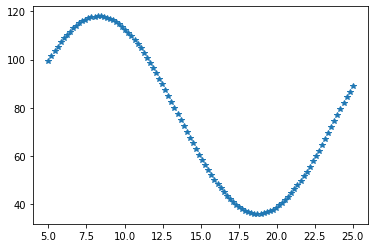

In [6]:
plt.plot(x,y,'*')

## Addition of noise

In [7]:
x += np.random.uniform(-0.5,0.5,len(x))
y += np.random.uniform(-0.5,0.5,len(x))

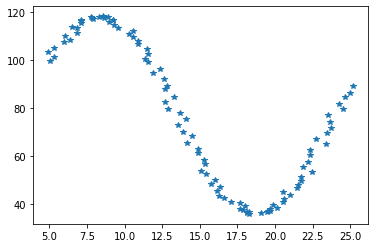

In [8]:
plt.plot(x,y,'*')

## Placeholders and Variables Definition

In [9]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [10]:
np.random.rand(4)

array([0.45304856, 0.20064522, 0.63112898, 0.01779126])

In [11]:
A = tf.Variable(39.0)
B = tf.Variable(0.2)
C = tf.Variable(20.0)
D = tf.Variable(70.0)

## Defining Model

In [12]:
y_model = tf.add(tf.multiply(tf.sin(tf.multiply(tf.subtract(X,C),B)),A),D)

## Mean Squared Error

In [13]:
error = tf.reduce_sum(tf.square(y_model-Y)) / len(x) #Mean Squared Error

## Gradient Descent Optimizer

In [14]:
optim = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error) #Gradient Descent

## Running Tensorflow Session

In [15]:
init = tf.global_variables_initializer() #Global Variabel Initializer

In [16]:
with tf.Session() as sess: #Session
    sess.run(init)
    
    for epochs in range(200): #500 epochs
        
        for (xs,ys) in zip(x,y):
            sess.run(optim, feed_dict = {X:xs,Y:ys})
            
        if epochs%5 == 0:
            print('Epoch: {}, Error: {}'.format(epochs+10,sess.run(error, feed_dict = {X:x,Y:y})))
    
    error_cost = sess.run(error, feed_dict = {X:x,Y:y})
    pred_a = sess.run(A)
    pred_b = sess.run(B)
    pred_c = sess.run(C)
    pred_d = sess.run(D)

Epoch: 10, Error: 1729.2962646484375
Epoch: 15, Error: 484.846435546875
Epoch: 20, Error: 426.3367004394531
Epoch: 25, Error: 371.8323059082031
Epoch: 30, Error: 322.3465270996094
Epoch: 35, Error: 278.1941833496094
Epoch: 40, Error: 239.3280029296875
Epoch: 45, Error: 205.49661254882812
Epoch: 50, Error: 176.31185913085938
Epoch: 55, Error: 151.3156280517578
Epoch: 60, Error: 130.02439880371094
Epoch: 65, Error: 111.96112060546875
Epoch: 70, Error: 96.6703872680664
Epoch: 75, Error: 83.74142456054688
Epoch: 80, Error: 72.80254364013672
Epoch: 85, Error: 63.5288200378418
Epoch: 90, Error: 55.63727951049805
Epoch: 95, Error: 48.89152908325195
Epoch: 100, Error: 43.093421936035156
Epoch: 105, Error: 38.0768928527832
Epoch: 110, Error: 33.70609664916992
Epoch: 115, Error: 29.874528884887695
Epoch: 120, Error: 26.49700927734375
Epoch: 125, Error: 23.505353927612305
Epoch: 130, Error: 20.847919464111328
Epoch: 135, Error: 18.48430061340332
Epoch: 140, Error: 16.384122848510742
Epoch: 145, E

In [17]:
pred_a,pred_b,pred_c,pred_d

(41.417267, 0.29992542, 23.921099, 76.446594)

In [18]:
error_cost #Minimum Error

7.087058

In [19]:
pred = pred_d + (pred_a * (np.sin(b * (x-c))))

## Visualizing Predicted Curve

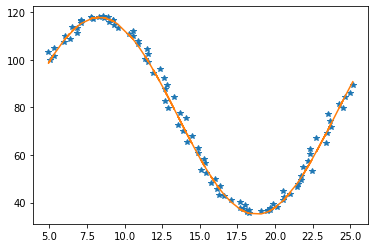

In [20]:
plt.plot(x,y,'*') #Plotting original Data
plt.plot(x,pred) #Plotting predicted Sine